   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural  2024-06-06       Component     Minor   
1          2           6  Functional  2024-04-26       Component     Minor   
2          3          84  Structural  2024-02-15        Internal     Minor   
3          4          10  Functional  2024-03-28        Internal  Critical   
4          5          14    Cosmetic  2024-04-26       Component     Minor   

   inspection_method  repair_cost defect_month  
0  Visual Inspection       245.47      2024-06  
1  Visual Inspection        26.87      2024-04  
2  Automated Testing       835.81      2024-02  
3  Automated Testing       444.47      2024-03  
4     Manual Testing       823.64      2024-04  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-nul

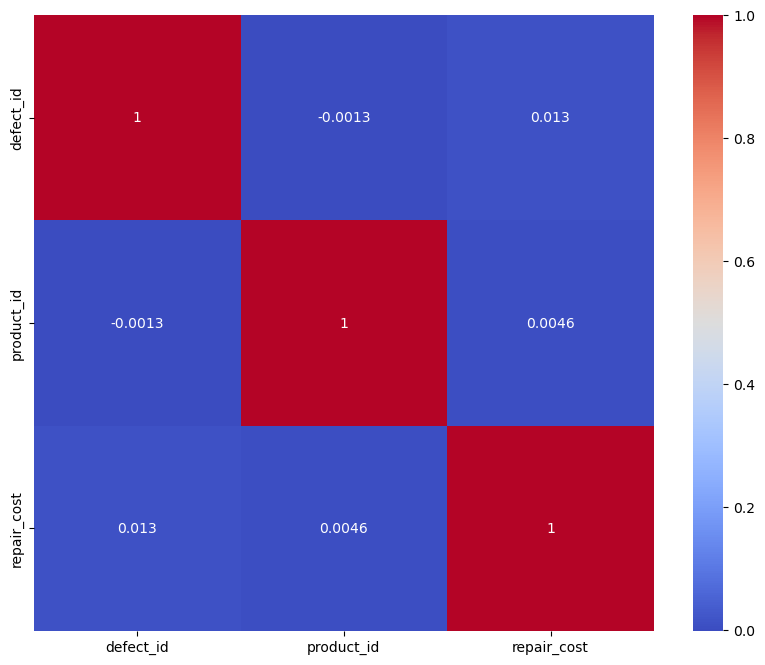

MAE: 254.42585710324923
MSE: 87531.34464220937


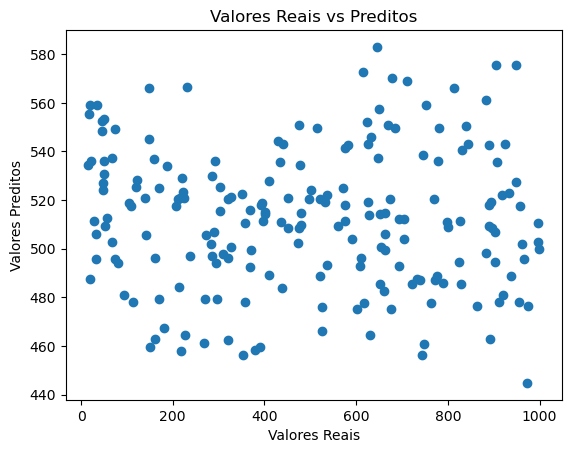

In [2]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar os dados
data = pd.read_csv('/home/caio/dxzl-academy/machine-learning/clean_data.csv')

# Explorar os dados
print(data.head())
print(data.info())
print(data.describe())

# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Visualizar correlações
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Selecionar características e alvo
X = data[['defect_type', 'defect_location', 'severity', 'inspection_method', 'defect_month']]
y = data['repair_cost']

# Pré-processamento (codificação de variáveis categóricas)
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

# Visualizar resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.show()